#  SMS Spam Classifier (No API Required)

A quick end-to-end machine learning project you can run locally.
- Dataset: **UCI SMS Spam Collection**
- Model: **TF-IDF + Logistic Regression**
- Metrics: Accuracy, classification report, confusion matrix
- Artifacts: Saved pipeline (`sms_spam_model.joblib`)



In [1]:
import sys, sklearn, pandas as pd, numpy as np, matplotlib
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)

Python: 3.11.13
pandas: 2.3.3
numpy: 2.3.3
scikit-learn: 1.7.2
matplotlib: 3.10.6


## 1) Load Dataset

In [2]:
import os, pandas as pd, urllib.request, zipfile, io

# Preferred local path (adjust if needed)
local_path = os.path.expanduser("~/Documents/AI-Projects/SMSSpamCollection")

def load_sms_dataframe():
    if os.path.exists(local_path):
        print("Loading from local file:", local_path)
        return pd.read_csv(local_path, sep="\t", header=None, names=["label", "text"])
    else:
        print("Local file not found. Downloading from UCI repository...")
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
        with urllib.request.urlopen(url, timeout=30) as resp:
            zdata = resp.read()
        zf = zipfile.ZipFile(io.BytesIO(zdata))
        with zf.open("SMSSpamCollection") as f:
            return pd.read_csv(f, sep="\\t", header=None, names=["label", "text"])

df = load_sms_dataframe()
print(df.shape)
df.head()

Loading from local file: /Users/bandaanusha/Documents/AI-Projects/SMSSpamCollection
(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2) Train / Test Split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)
len(X_train), len(X_test), y_train.value_counts()[:5]

(4457,
 1115,
 label
 ham     3859
 spam     598
 Name: count, dtype: int64)

## 3) Build Pipeline (TF-IDF → Logistic Regression) & Train

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=200))
])

pipe.fit(X_train, y_train)
"Model trained!"


'Model trained!'

## 4) Evaluation

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

preds = pipe.predict(X_test)
acc = accuracy_score(y_test, preds)
print("Accuracy:", round(acc, 4))
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds, labels=["ham", "spam"])
cm


Accuracy: 0.9704
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



array([[966,   0],
       [ 33, 116]])

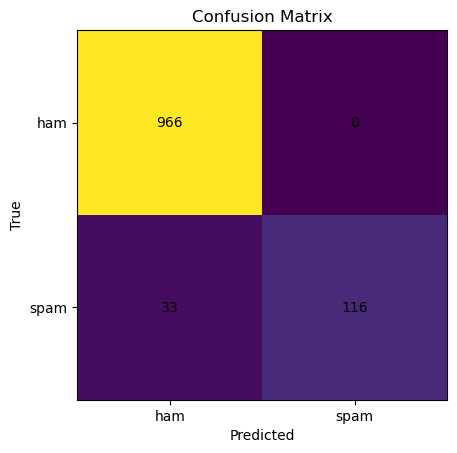

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xticks([0,1], ["ham","spam"])
plt.yticks([0,1], ["ham","spam"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


## 5) Try Your Own Messages

In [7]:
def predict_sms(messages):
    return list(zip(messages, pipe.predict(messages)))

samples = [
    "CONGRATULATIONS! You’ve won a free vacation. Call now to claim.",
    "Hey, are we still meeting at 5?",
    "URGENT! Your account will be closed unless you update your info."
]
predict_sms(samples)


[('CONGRATULATIONS! You’ve won a free vacation. Call now to claim.', 'spam'),
 ('Hey, are we still meeting at 5?', 'ham'),
 ('URGENT! Your account will be closed unless you update your info.', 'ham')]

## 6) Save Model & Reload Later

In [8]:
import joblib, os

artifact_path = os.path.abspath("sms_spam_model.joblib")
joblib.dump(pipe, artifact_path)
print("Saved model to:", artifact_path)

loaded = joblib.load(artifact_path)
loaded.predict(["Win a brand new iPhone by clicking this link!"])


Saved model to: /Users/bandaanusha/Documents/AI-Projects/sms_spam_model.joblib


array(['ham'], dtype=object)

## 7) Summary

**Caption:**  
> 🚀 Built a fully local **SMS Spam Classifier** in Python—no APIs needed.  
> Stack: scikit-learn (TF-IDF + Logistic Regression).  
> ✅ Clean 80/20 split, TF-IDF features with bi-grams  
> ✅ Accuracy + classification report + confusion matrix  
> ✅ Saved the pipeline with `joblib` + quick predict function  
> Next up: hyperparameter search + model comparison (LinearSVC, SGD).
